In [ ]:
1. Data Ingestion
2. EDA
3. FE 
4. Model building
5. Evaluation 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

C:\Users\marve\AppData\Local\Temp\ipykernel_32748\585249826.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv("Data/winequality-red.csv")

In [5]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
data.sample()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
546            7.5              0.55         0.24             2.0      0.078   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
546                 10.0                  28.0   0.9983  3.45       0.78   

     alcohol  quality  
546      9.5        6

In [8]:
data.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1433            6.1              0.40         0.16             1.8      0.069   
1188            6.7              0.64         0.23             2.1      0.080   
875             8.8              0.31         0.40             2.8      0.109   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1433                 11.0                  25.0  0.99550  3.42       0.74   
1188                 11.0                 119.0  0.99538  3.36       0.70   
875                   7.0                  16.0  0.99614  3.31       0.79   

      alcohol  quality  
1433     10.1        7  
1188     10.9        5  
875      11.8        7

In [9]:
data.shape

(1599, 12)

In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
data.duplicated().sum()

240

In [14]:
data[data.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [15]:
#pre-processing techniques


In [18]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [27]:
x = data.drop("quality", axis=1)
x



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [29]:
y = data["quality"]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
train_x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
582            11.7             0.490         0.49             2.2      0.083   
626             8.8             0.600         0.29             2.2      0.098   
1030            7.1             0.590         0.00             2.1      0.091   
620             8.3             0.540         0.24             3.4      0.076   
490             9.3             0.775         0.27             2.8      0.078   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
582                   5.0                  15.0  1.00000  3.19       0.43   
626                   5.0                  15.0  0.99880  3.36       0.49   
1030                  9.0                  14.0  0.99488  3.42       0.55   
620                  16.0                 112.0  0.99760  3.27       0.61   
490                  24.0                  56.0  0.99840  3.31       0.67   
...                   ...                   ...      ...   ...        ...   
1130                  5.0                  10.0  0.99770  3.18       0.63   
1294                 25.0                  60.0  0.99638  3.29       0.75   
860                  15.0                  85.0  0.99746  3.51       0.54   
1459                  7.0                  15.0  0.99458  3.32       0.80   
1126                  3.0                  11.0  0.99150  3.39       0.54   

      alcohol  
582       9.2  
626       9.1  
1030     11.5  
620       9.4  
490      10.6  
...       ...  
1130     10.4  
1294     10.9  
860       9.5  
1459     11.9  
1126     13.5  

[1199 rows x 11 columns]

In [33]:
test_x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
1565            6.7              0.67         0.02            1.90      0.061   
327            10.3              0.44         0.50            4.50      0.107   
254             7.1              0.60         0.00            1.80      0.074   
322             7.8              0.62         0.05            2.30      0.079   
1160           10.6              0.36         0.57            2.30      0.087   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
803                  14.0                  46.0  0.99710  3.24       0.66   
124                  21.0                 102.0  0.99600  3.39       0.48   
350                  17.0                  34.0  1.00040  3.28       0.98   
682                  32.0                  58.0  0.99800  3.33       0.54   
1326                 18.0                  34.0  0.99480  3.39       0.60   
...                   ...                   ...      ...   ...        ...   
1565                 26.0                  42.0  0.99489  3.39       0.82   
327                   5.0                  13.0  0.99800  3.28       0.83   
254                  16.0                  34.0  0.99720  3.47       0.70   
322                   6.0                  18.0  0.99735  3.29       0.63   
1160                  6.0                  20.0  0.99676  3.14       0.72   

      alcohol  
803       9.6  
124       9.5  
350       9.9  
682       9.8  
1326     10.6  
...       ...  
1565     10.9  
327      11.5  
254       9.9  
322       9.3  
1160     11.1  

[400 rows x 11 columns]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_train = scaler.fit_transform(train_x)

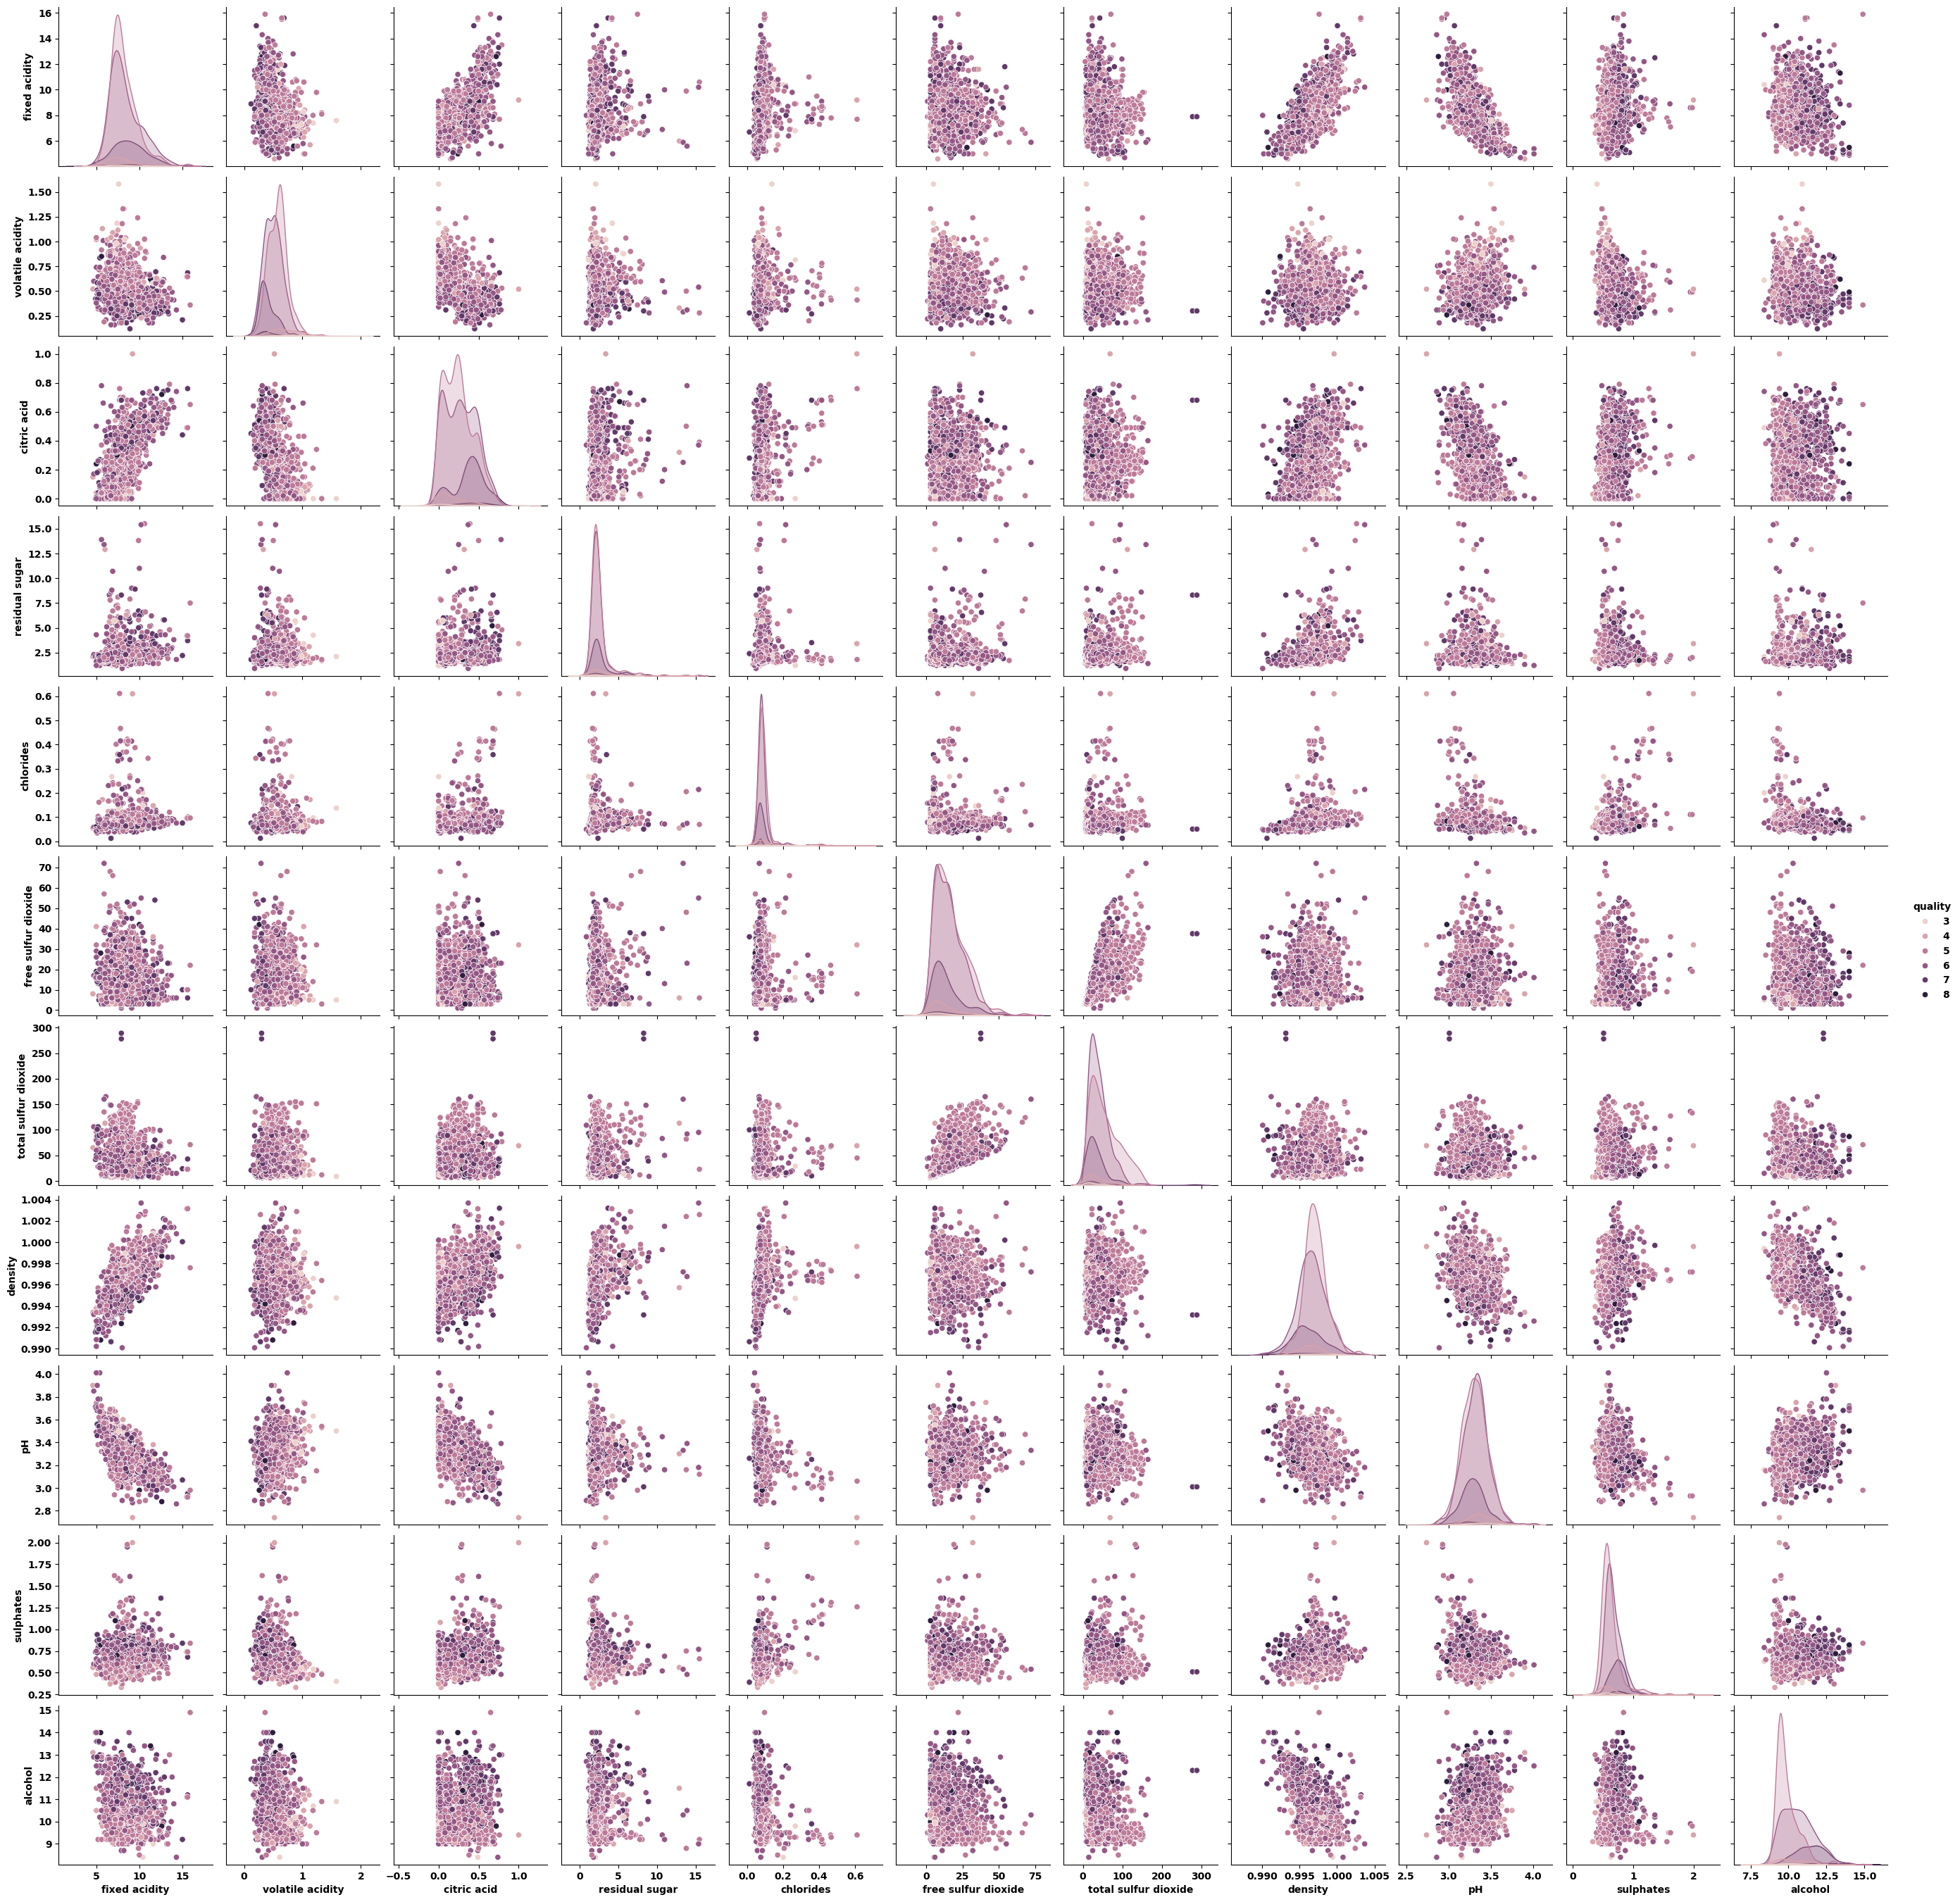

In [39]:
#SVM
import seaborn as sns 
sns.pairplot(data, hue="quality")

In [40]:
from sklearn.svm import SVC
model = SVC()

In [42]:
model.fit(scaled_train,train_y)

SVC()

In [43]:
scaled_test=scaler.transform(test_x)

In [46]:
y_pred = model.predict(scaled_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred)*100

62.74999999999999

In [49]:
round(accuracy_score(test_y,y_pred)*100)

63

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.1,1,10,500,50],"gamma":[1,0.5,0.1,0.01,0.001]}

In [62]:
grid  = GridSearchCV(SVC(),param_grid,cv=5,verbose=1,n_jobs=-1) #cv ie, for 5 time iteration

In [63]:
grid.fit(scaled_train,train_y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 500, 50],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=1)

In [50]:
train_x.shape

(1199, 11)

In [51]:
#1199/5   #239.8 for validation
#1199 - 240 = 959 for training

239.8

In [64]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [65]:
model_new = SVC(C=1,gamma=1)

In [66]:
model_new.fit(scaled_train,train_y)

SVC(C=1, gamma=1)

In [69]:
pred = model_new.predict(scaled_test)

In [71]:
accuracy_score(test_y,pred)*100

65.5

In [ ]:
#perform detail EDA on top of the data
# every possible preprocessing tecjniques which is suitable for model building
#build the model and find accuracy
#trying with RandomSaerch CV and different hyperprameters
#check the time and memory difference compared to gridsaerch CV